In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
5
0
4
1
9


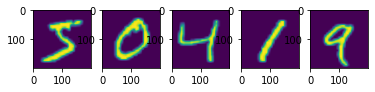

In [4]:
from keras.datasets import mnist, cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
#MNIST ataset download
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#CFAR10ataset download

# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

fig = plt.gcf()

for i in range(5):
  sp = plt.subplot(1, 5, i+1)

  resized_img = cv2.resize(x_train[i], (200, 200))
  plt.imshow(resized_img)
  print(y_train[i])
plt.show()




In [5]:
#for MNIST
x_train = x_train.reshape(-1, 28, 28, 1)/255
x_test = x_test.reshape(-1, 28, 28, 1)/255

#for CIFAR10
# x_train = x_train.reshape(-1, 32, 32, 3)/255
# x_test = x_test.reshape(-1, 32, 32, 3)/255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)



In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28, 28, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [8]:
NUM_ITER = 3

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=NUM_ITER, batch_size = 100, verbose = 1)


Epoch 1/3
600/600 [==============================] - 121s 201ms/step - loss: 0.1666 - accuracy: 0.9511 - val_loss: 0.0531 - val_accuracy: 0.9836
Epoch 2/3
600/600 [==============================] - 118s 196ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0375 - val_accuracy: 0.9877
Epoch 3/3
600/600 [==============================] - 126s 210ms/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.0334 - val_accuracy: 0.9887


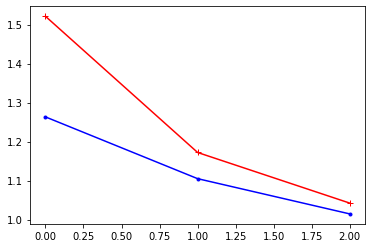

In [ ]:
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

plt.plot(train_loss, marker='+', c='red', label='Train-loss')
plt.plot(valid_loss, marker='.', c='blue', label='Valid-loss')



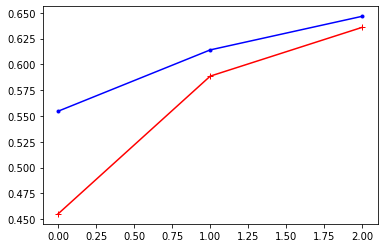

In [ ]:
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

plt.plot(train_acc, marker='+', c='red', label='Train-Accuracy')
plt.plot(valid_acc, marker='.', c='blue', label='Valid-Accuracy')


In [21]:
from google.colab import files
upload = files.upload()

Saving 7.png to 7.png


In [22]:
import cv2
file_path = './7.png'
image = cv2.imread(file_path)
print(image.shape)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print(image.shape)

image = cv2.resize(image, (28, 28))
image = image.reshape(1, 28, 28, 1)/255
prediction = model.predict(image)

print(prediction)


prediction = prediction.argmax(axis=-1)
print(prediction)


(538, 422, 3)
(538, 422)
[[9.7203210e-02 5.9098203e-02 6.4190030e-02 6.5818655e-01 7.3994837e-05
  6.4630315e-02 4.2485907e-03 1.4459674e-03 4.6673056e-02 4.2501003e-03]]
[3]
